In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data_movies = pd.read_csv('movies.csv')
data_tages = pd.read_csv('tags.csv')
data_ratings = pd.read_csv('ratings.csv')

In [3]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
data_movies.movieId.value_counts(),print('Jumlah id unik yang diduplikasi adalah: ',data_movies.movieId.duplicated().sum())

Jumlah id unik yang diduplikasi adalah:  0


D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(57669     1
 112183    1
 2732      1
 685       1
 70293     1
          ..
 81229     1
 91470     1
 5456      1
 50514     1
 82152     1
 Name: movieId, Length: 9742, dtype: int64,
 None)

In [5]:
data_tages

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
data_tages.movieId.value_counts()


296      181
2959      54
924       41
293       35
7361      34
        ... 
5694       1
85565      1
1586       1
6027       1
8190       1
Name: movieId, Length: 1572, dtype: int64

In [7]:
data_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
data_ratings.movieId.value_counts()


356       329
318       317
296       307
593       279
2571      278
         ... 
152085      1
164367      1
98799       1
4573        1
6141        1
Name: movieId, Length: 9724, dtype: int64

In [10]:
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [11]:
merge.drop(columns=['tag','timestamp','genres'],inplace=True)
merge

,movieId,title,userId
0,1,Toy Story (1995),336
1,1,Toy Story (1995),474
2,1,Toy Story (1995),567
3,2,Jumanji (1995),62
4,2,Jumanji (1995),62
...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),62
3679,193565,Gintama: The Movie (2010),184
3680,193565,Gintama: The Movie (2010),184
3681,193565,Gintama: The Movie (2010),184


In [12]:
len(merge.userId.unique()) 

58

In [13]:
merge_list = merge.groupby(by = ["userId"])["title"].apply(list).reset_index()
merge_list.head()

,userId,title
0,2,"[Step Brothers (2008), Step Brothers (2008), S..."
1,7,"[Departed, The (2006)]"
2,18,"[Carlito's Way (1993), Carlito's Way (1993), C..."
3,21,"[My Best Friend's Wedding (1997), My Best Frie..."
4,49,"[Interstellar (2014), Interstellar (2014), Int..."


In [14]:
merge_list = merge_list["title"].tolist()
merge_list[0:3]

[['Step Brothers (2008)',
  'Step Brothers (2008)',
  'Step Brothers (2008)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Warrior (2011)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)',
  'Wolf of Wall Street, The (2013)'],
 ['Departed, The (2006)'],
 ["Carlito's Way (1993)",
  "Carlito's Way (1993)",
  "Carlito's Way (1993)",
  'Godfather: Part II, The (1974)',
  'Godfather: Part II, The (1974)',
  'Pianist, The (2002)',
  'Pianist, The (2002)',
  'Lucky Number Slevin (2006)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Fracture (2007)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Upside Down: The Creation Records Story (2010)',
  'Just Eat It: A Food Waste Story (2014)',
  'Just Eat It: A Food Waste Story (2014)']]

In [15]:
len(merge.userId.unique())
len(merge_list)

58

In [21]:
pip install mlxtend

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [22]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(merge_list).transform(merge_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [23]:
df.head()


,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),127 Hours (2010),13 Going on 30 (2004),2001: A Space Odyssey (1968),21 Grams (2003),25th Hour (2002),28 Days Later (2002),"39 Steps, The (1935)",3:10 to Yuma (2007),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 Up (1998),84 Charing Cross Road (1987),8MM (1999),A Million Ways to Die in the West (2014),A Pigeon Sat on a Branch Reflecting on Existence (2014),A Story of Children and Film (2013),A.I. Artificial Intelligence (2001),About a Boy (2002),"Accused, The (1988)",Adam's Rib (1949),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","African Queen, The (1951)",After the Thin Man (1936),"Age of Innocence, The (1993)",Air Force One (1997),Airheads (1994),Airplane! (1980),Akira (1988),Aladdin (1992),Alfie (1966),Alice Adams (1935),Alice Doesn't Live Here Anymore (1974),Alice in Wonderland (1951),Alien (1979),Aliens (1986),Alive (1993),All About Eve (1950),All the King's Men (1949),All the President's Men (1976),All the Real Girls (2003),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Amen. (2002),America's Sweethearts (2001),American Gangster (2007),American History X (1998),American Movie (1999),American Pie (1999),"American President, The (1995)",American Splendor (2003),"American in Paris, An (1951)","Americanization of Emily, The (1964)",Anastasia (1956),Anatomy of a Murder (1959),Anchorman 2: The Legend Continues (2013),Anchorman: The Legend of Ron Burgundy (2004),And Then There Were None (1945),And the Band Played On (1993),"Andalusian Dog, An (Chien andalou, Un) (1929)",Angel's Egg (Tenshi no tamago) (1985),Angie (1994),Animal House (1978),"Animatrix, The (2003)",Anna Karenina (1997),Anne Frank Remembered (1995),Anne of the Thousand Days (1969),Annie Hall (1977),Another Thin Man (1939),"Apartment, The (1960)",Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Argo (2012),"Aristocats, The (1970)",Armageddon (1998),Around the World in 80 Days (1956),Arrival (2016),"Arrival, The (1996)",Arsenic and Old Lace (1944),"Astronaut's Wife, The (1999)",Au Hasard Balthazar (1966),Auntie Mame (1958),Avalon (1990),Avatar (2009),"Avengers, The (2012)",Avengers: Infinity War - Part I (2018),"Aviator, The (2004)","Awful Truth, The (1937)","Babadook, The (2014)",Babe (1995),Babel (2006),Babette's Feast (Babettes gæstebud) (1987),Babylon 5: In the Beginning (1998),"Bachelor and the Bobby-Soxer, The (1947)",Back to the Future (1985),Back to the Future Part II (1989),Bad Day at Black Rock (1955),"Bad News Bears, The (1976)","Bad Seed, The (1956)","Bad and the Beautiful, The (1952)","Ballad of Jack and Rose, The (2005)","Bank Job, The (2008)",Barton Fink (1991),"Basketball Diaries, The (1995)",Batman (1989),Batman Forever (1995),Batman Returns (1992),Batman v Superman: Dawn of Justice (2016),Battle Royale (Batoru rowaiaru) (2000),"Battle of Algiers, The (La battaglia di Algeri) (1966)",Beasts of No Nation (2015),Beasts of the Southern Wild (2012),Beat the Devil (1953),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Before Sunrise (1995),Before Sunset (2004),Begotten (1990),Being Julia (2004),Being There (1979),"Believer, The (2001)",Bend It Like Beckham (2002),Benny & Joon (1993),Best in Show (2000),Better Luck Tomorrow (2002),Better Off Dead... (1985),Beyond Silence (Jenseits der Stille) (1996),Big (1988),Big Business (1988),Big Daddy (1999),Big Eyes (2014),Big Fish (2003),Big Hero 6 (2014),"Big Kahuna, The (2000)","Big Lebowski, The (1998)",Big Night (1996),"Big Short, The (2015)","Big Sleep, The (1946)",Big Top Pee-Wee (1988),Bill & Ted's Bogus Journey (1991),Bill & Ted's Excellent Adventure (1989

In [24]:
df.shape


(58, 1572)

In [25]:
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

Wall time: 0 ns


,support,itemsets
0,0.051724,(Step Brothers (2008))
1,0.034483,"(Wolf of Wall Street, The (2013))"
2,0.017241,(Warrior (2011))
3,0.051724,"(Departed, The (2006))"
4,0.034483,"(Godfather: Part II, The (1974))"


In [26]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2    774986
1      1572
Name: itemsets, dtype: int64

In [27]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1,0.034483,"(Wolf of Wall Street, The (2013))",1
2,0.017241,(Warrior (2011)),1
3,0.051724,"(Departed, The (2006))",1
4,0.034483,"(Godfather: Part II, The (1974))",1
...,...,...,...
776553,0.017241,"(Shine (1996), Night of the Shooting Stars (No...",2
776554,0.017241,"(Staying Alive (1983), Night of the Shooting S...",2
776555,0.017241,"(Gladiator (2000), Night of the Shooting Stars...",2
776556,0.017241,(Night of the Shooting Stars (Notte di San Lor...,2


In [28]:
fpgrowth_frequent_itemsets[(fpgrowth_frequent_itemsets['length'] > 1)
                          & (fpgrowth_frequent_itemsets['support'] > 0.06)].head()

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
5225,0.068966,"(Eternal Sunshine of the Spotless Mind (2004),...",2
5392,0.086207,"(Donnie Darko (2001), Eternal Sunshine of the ...",2
5394,0.068966,"(Donnie Darko (2001), Memento (2000))",2
7011,0.068966,"(Blade Runner (1982), Donnie Darko (2001))",2
7012,0.068966,"(Blade Runner (1982), Memento (2000))",2


In [29]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'] == {'Step Brothers (2008)', 'Corpse Bride (2005)'}]

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2


In [30]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'Step Brothers (2008)' in str(x))]

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.051724,(Step Brothers (2008)),1
1572,0.034483,"(Step Brothers (2008), Anchorman: The Legend o...",2
1573,0.017241,"(Step Brothers (2008), Corpse Bride (2005))",2
1574,0.017241,"(Step Brothers (2008), City of God (Cidade de ...",2
1575,0.017241,"(Departed, The (2006), Step Brothers (2008))",2
...,...,...,...
10131,0.017241,"(Step Brothers (2008), Prisoners (2013))",2
10201,0.017241,"(Old School (2003), Step Brothers (2008))",2
10272,0.017241,"(Step Brothers (2008), Now You See Me (2013))",2
10344,0.017241,"(Step Brothers (2008), Night at the Roxbury, A...",2


D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


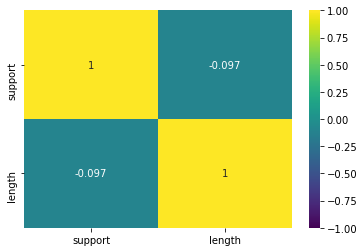

In [35]:
import seaborn as sns
sns.heatmap(data=fpgrowth_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='viridis');

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


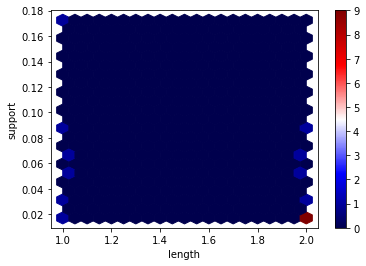

In [34]:
fpgrowth_frequent_itemsets.plot.hexbin(x='length',y='support',cmap='seismic',gridsize=20,sharex=False,bins=10);

In [36]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 45.5 s


In [37]:
rules

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Step Brothers (2008)),(Anchorman: The Legend of Ron Burgundy (2004)),0.051724,0.068966,0.034483,0.666667,9.666667,0.030916,2.793103
1,(Anchorman: The Legend of Ron Burgundy (2004)),(Step Brothers (2008)),0.068966,0.051724,0.034483,0.500000,9.666667,0.030916,1.896552
2,(Step Brothers (2008)),(Corpse Bride (2005)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
3,(Corpse Bride (2005)),(Step Brothers (2008)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
4,(Step Brothers (2008)),(City of God (Cidade de Deus) (2002)),0.051724,0.051724,0.017241,0.333333,6.444444,0.014566,1.422414
...,...,...,...,...,...,...,...,...,...
1549967,(Night of the Shooting Stars (Notte di San Lor...,(Gladiator (2000)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549968,(Night of the Shooting Stars (Notte di San Lor...,(I'm Not Scared (Io non ho paura) (2003)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf
1549969,(I'm Not Scared (Io non ho paura) (2003)),(Night of the Shooting Stars (Notte di San Lor...,0.034483,0.017241,0.017241,0.500000,29.000000,0.016647,1.965517
1549970,(Hard-Boiled (Lat sau san taam) (1992)),(John Wick: Chapter Two (2017)),0.017241,0.034483,0.017241,1.000000,29.000000,0.016647,inf


In [38]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].sort_values(ascending=False,by='lift')

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1534852,(Inception (2010)),(Gentlemen Broncos (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538020,(Inception (2010)),(Rare Exports: A Christmas Tale (Rare Exports)...,0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538286,(Inception (2010)),((500) Days of Summer (2009)),0.068966,0.017241,0.017241,0.25,14.500000,0.016052,1.310345
1538320,(Inception (2010)),"(Avengers, The (2012))",0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034
1538361,(Inception (2010)),(Captain Phillips (2013)),0.068966,0.034483,0.034483,0.50,14.500000,0.032105,1.931034
...,...,...,...,...,...,...,...,...,...
36,(Inception (2010)),(Step Brothers (2008)),0.068966,0.051724,0.017241,0.25,4.833333,0.013674,1.264368
6183,(Inception (2010)),(Pulp Fiction (1994)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379
10875,(Inception (2010)),(Fight Club (1999)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379
460,(Inception (2010)),(Anchorman: The Legend of Ron Burgundy (2004)),0.068966,0.068966,0.017241,0.25,3.625000,0.012485,1.241379


In [39]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


lift
antecedents        consequents                                             
(Inception (2010)) (Gentlemen Broncos (2009))                          14.5
                   (Life Aquatic with Steve Zissou, The (2004))        14.5
                   (400 Blows, The (Les quatre cents coups) (1959))    14.5
                   (A Pigeon Sat on a Branch Reflecting on Existen...  14.5
                   (Arrival (2016))                                    14.5
                   (Andalusian Dog, An (Chien andalou, Un) (1929))     14.5
                   (Angel's Egg (Tenshi no tamago) (1985))             14.5
                   (Illusionist, The (2006))                           14.5
                   (Dunkirk (2017))                                    14.5
                   (Don't Breathe (2016))                              14.5

D:\Application\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


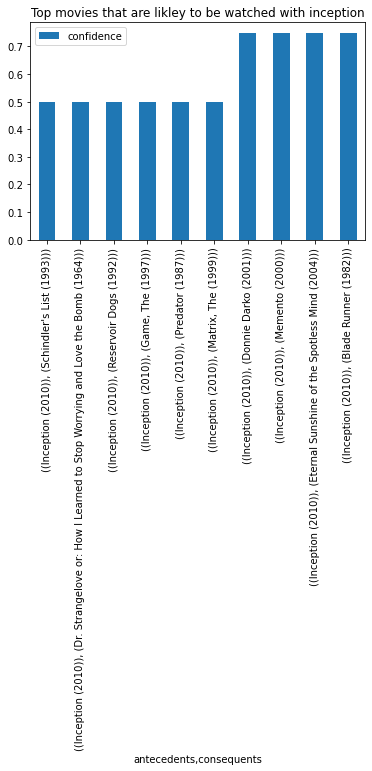

In [40]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');